### **Problem Statement** :
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
- The company is looking at prospective properties to buy, in order to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [125]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

## **DATA VISUALIZATION**

In [126]:
#loading dataset
dataframe = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
#dataset size check
dataframe.shape

(1460, 81)

In [128]:
#identifying available data types in the dataset
dataframe.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [129]:
#iedntifying the number of numerical and categorical features
numericalf = []
categoricalf = []
for i in dataframe.columns:
    if dataframe[i].dtypes != 'O':
        numericalf.append(i)
    else:
        categoricalf.append(i)
print('Total number of numerical features in the dataset:', len(numericalf))
print('Total number of categorical features in the dataset:', len(categoricalf))

Total number of numerical features in the dataset: 38
Total number of categorical features in the dataset: 43


In [130]:
#dataset values description
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [131]:
#check for null values in the data set
print(round(dataframe.isnull().sum()/len(dataframe.index)*100,2).sort_values(ascending=False)[ round(dataframe.isnull().sum()/len(dataframe.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


## **EDA**

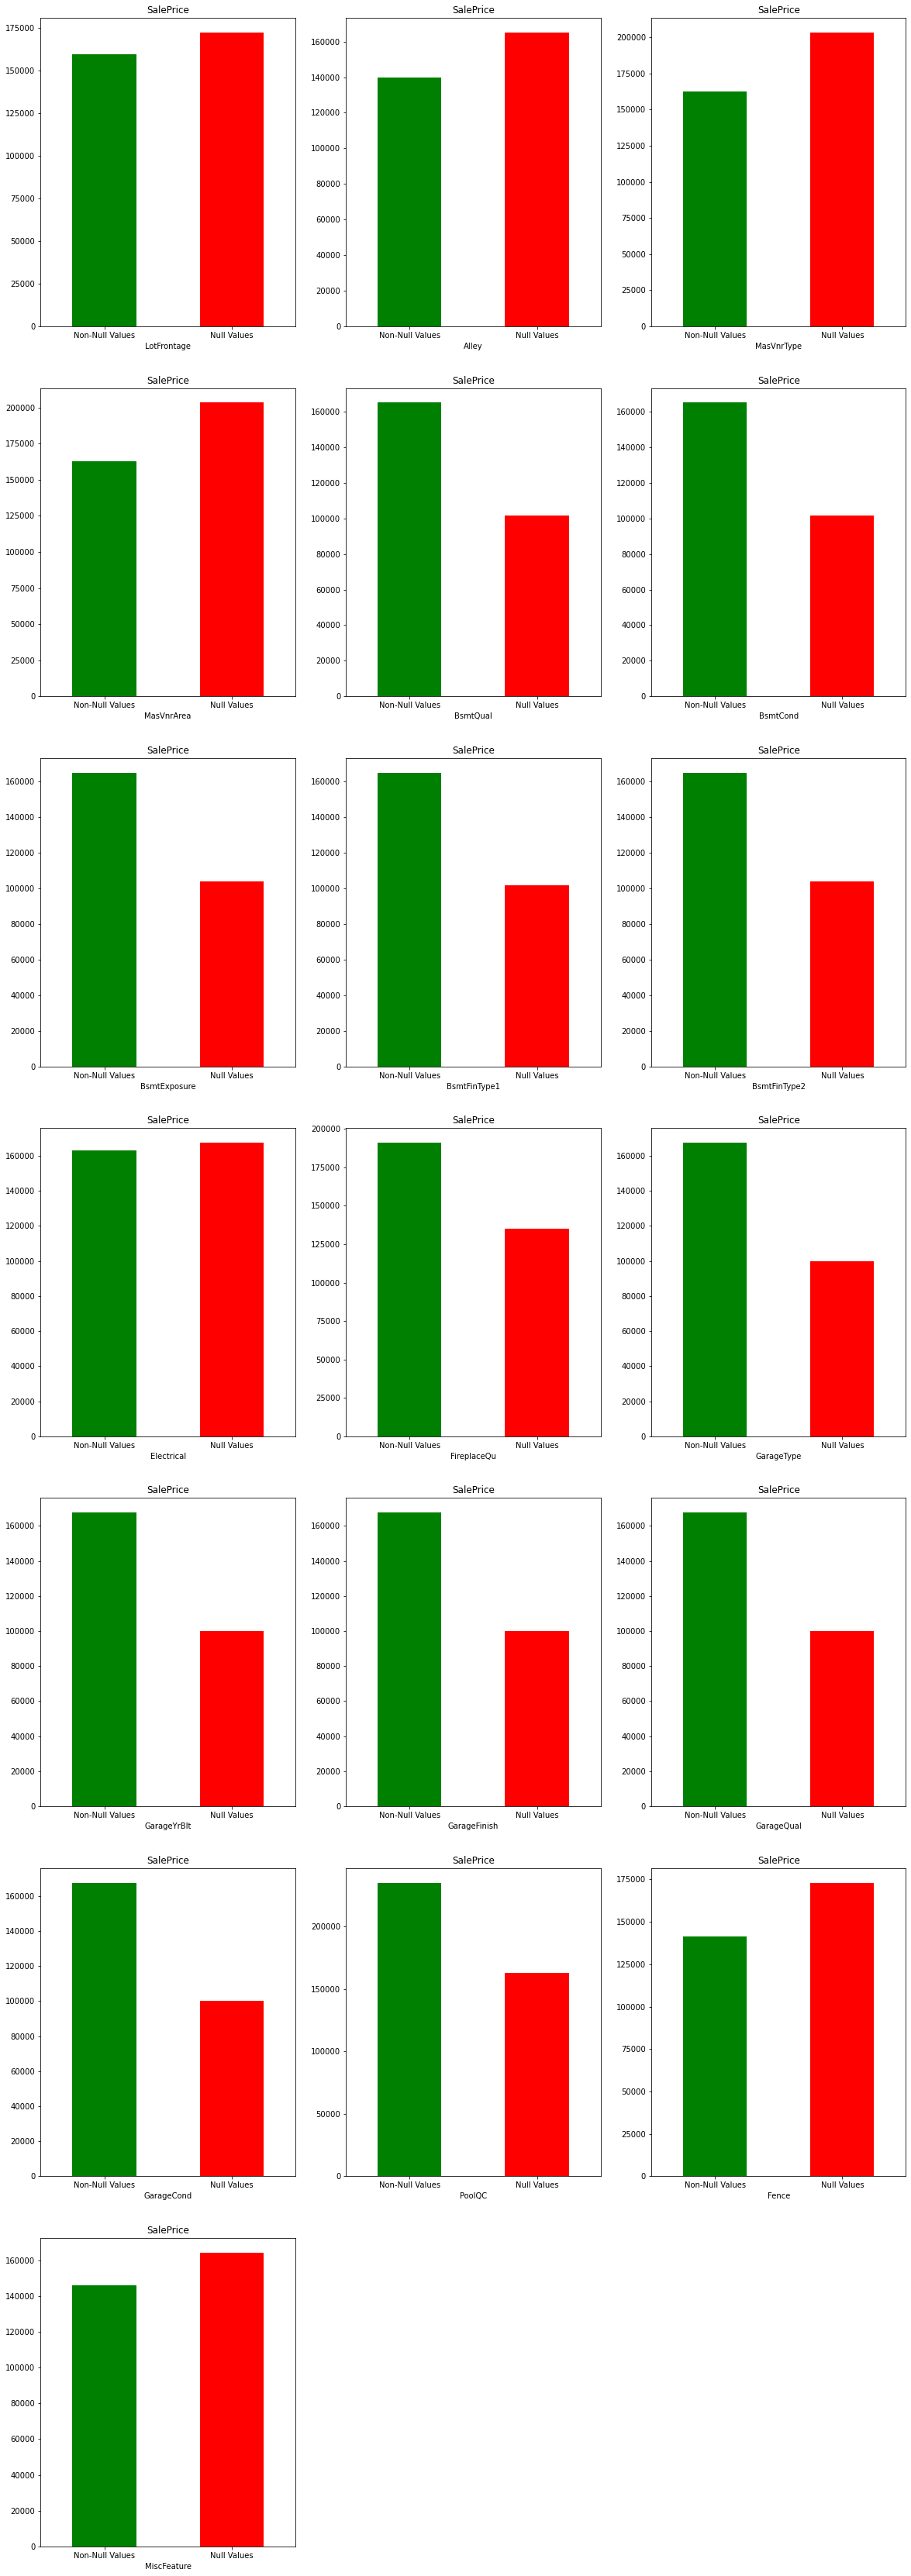

In [132]:
#we see there are 18 features with null values
#check their impact on sale price(target variable) also check for impact of non-null values
null = []
for i in dataframe.columns:
    if dataframe[i].isnull().sum() > 0:
        null.append(i)
dataframe_copy = dataframe.copy()    
fig,axs= plt.subplots(7,3,figsize=(20,60),squeeze=True)
for i,ax in zip(null,axs.flatten()):    
    dataframe_copy[i] = np.where(dataframe_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    dataframe_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
#removing the empty plots
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

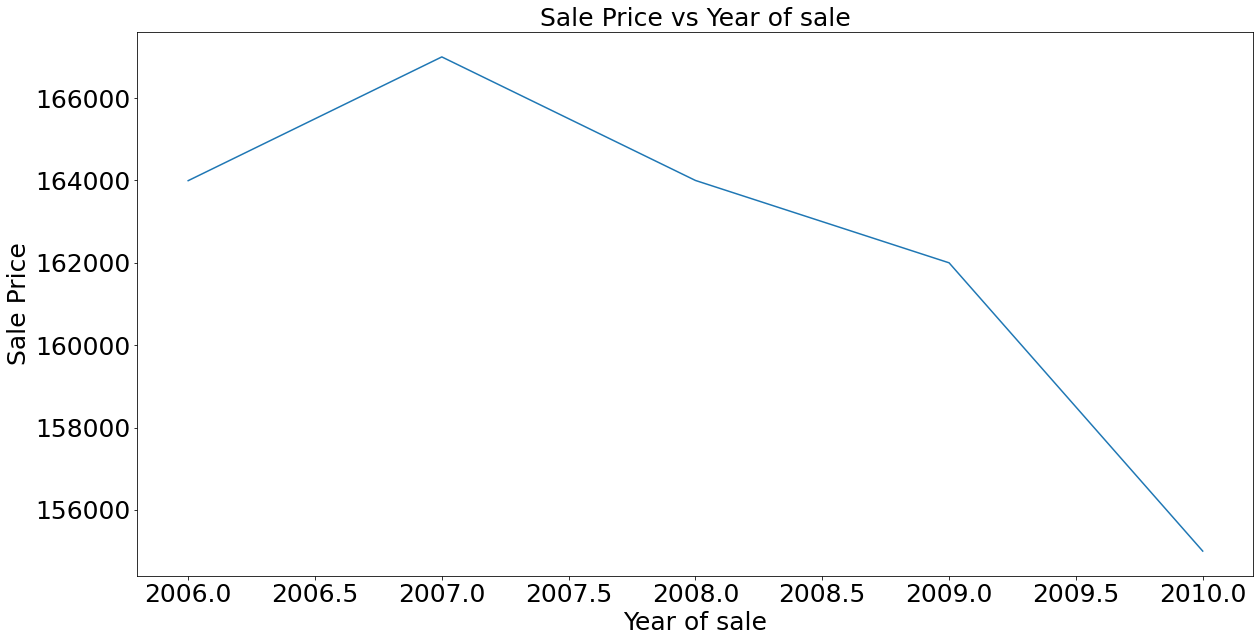

In [133]:
#as the dataset is of different years
#checking for the trend of sale price(median) over years
plt.figure(figsize=(20,10))
dataframe['YrSold'] = dataframe['YrSold'].astype('int')
dataframe.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of sale',fontsize =25)
plt.xticks(fontsize =25)
plt.ylabel('Sale Price',fontsize =25,)
plt.yticks(fontsize =25)
plt.title("Sale Price vs Year of sale",fontsize =25)
plt.show()

In [134]:
#sale price is well impacted by the year of sale
#extracting 'year' features present in data set
year_features = []
for i in dataframe.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        if i=='YrSold':
            break
        else:
            year_features.append(i)
print(year_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


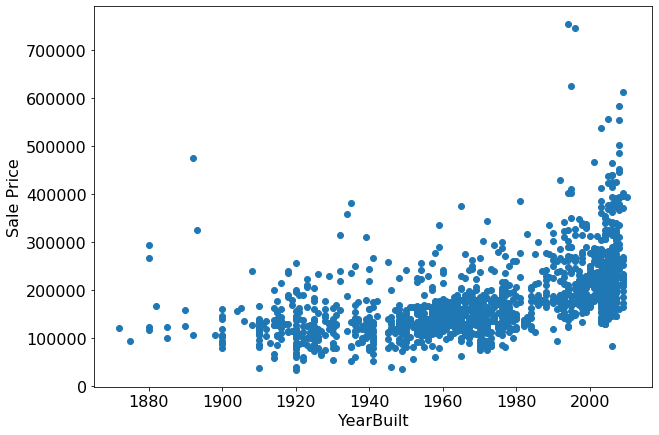

In [135]:
#plot to check effect of year built on sale price
plt.figure(figsize=(10,7))
plt.scatter(dataframe['YearBuilt'],dataframe['SalePrice'])
plt.xlabel('YearBuilt',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

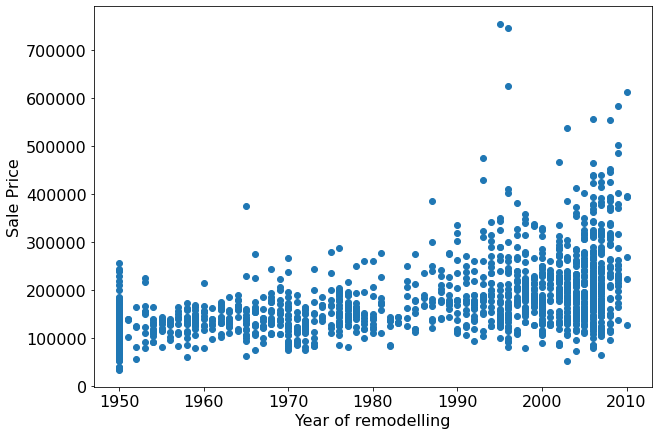

In [136]:
#plot to check effect of year remodelling done on sale price
plt.figure(figsize=(10,7))
plt.scatter(dataframe['YearRemodAdd'],dataframe['SalePrice'])
plt.xlabel('Year of remodelling',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

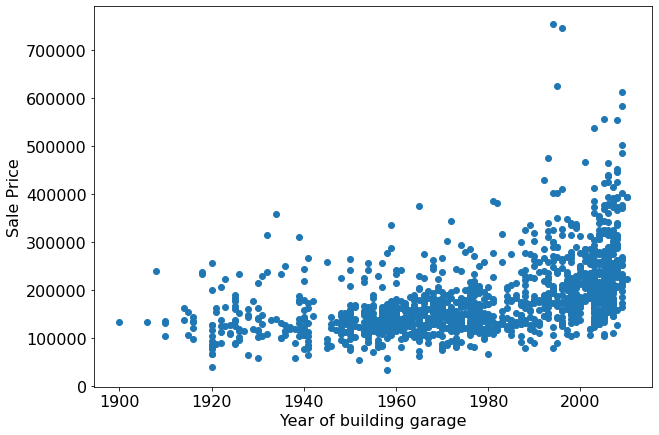

In [137]:
#plot to check effect of year garage built on sale price
plt.figure(figsize=(10,7))
plt.scatter(dataframe['GarageYrBlt'],dataframe['SalePrice'])
plt.xlabel('Year of building garage',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

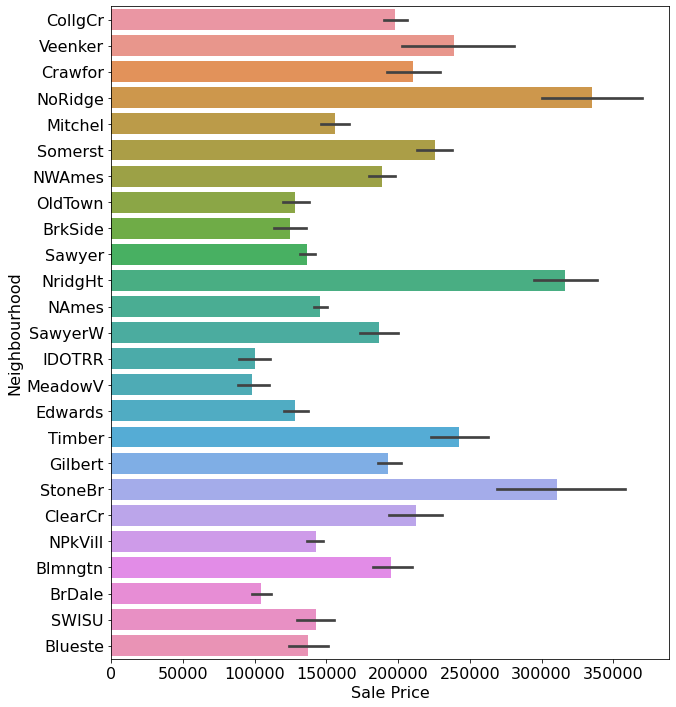

In [138]:
#checking effect of other features on sale price
#effect of neighbourhood
plt.figure(figsize=(10, 12))
sns.barplot(x="SalePrice", y="Neighborhood", data= dataframe)
plt.xlabel('Sale Price',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Neighbourhood',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

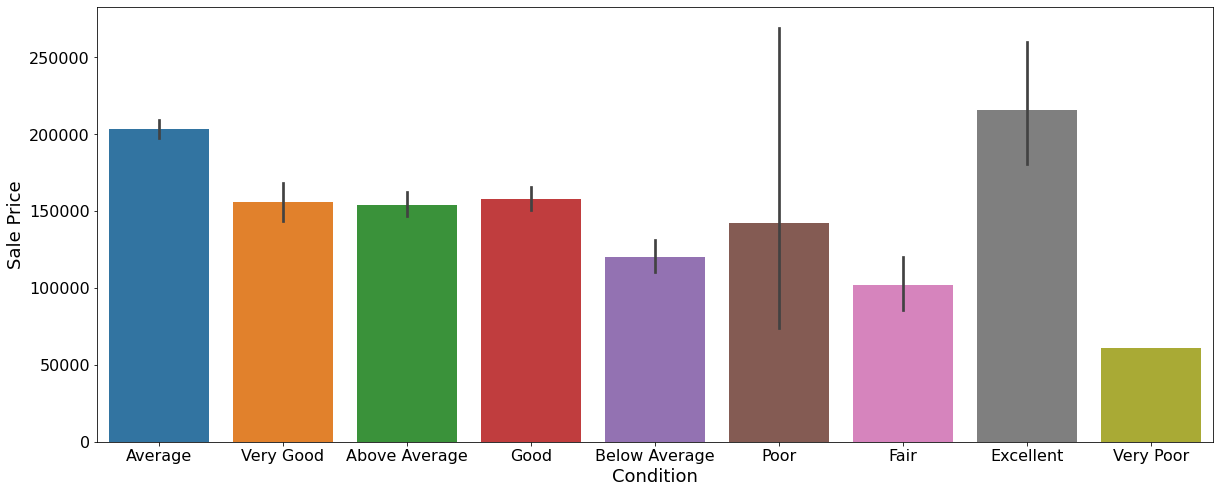

In [139]:
#effect of overall condition on sale price
plt.figure(figsize=(20, 8))
dataframe.OverallCond = dataframe.OverallCond.replace({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',
                                                        6:'Above Average',5:'Average',4:'Below Average',
                                                        3:'Fair',2:'Poor',1:'Very Poor'})
sns.barplot(x="OverallCond", y="SalePrice", data=dataframe)
plt.xlabel('Condition',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=18)
plt.yticks(fontsize=16)
plt.show()

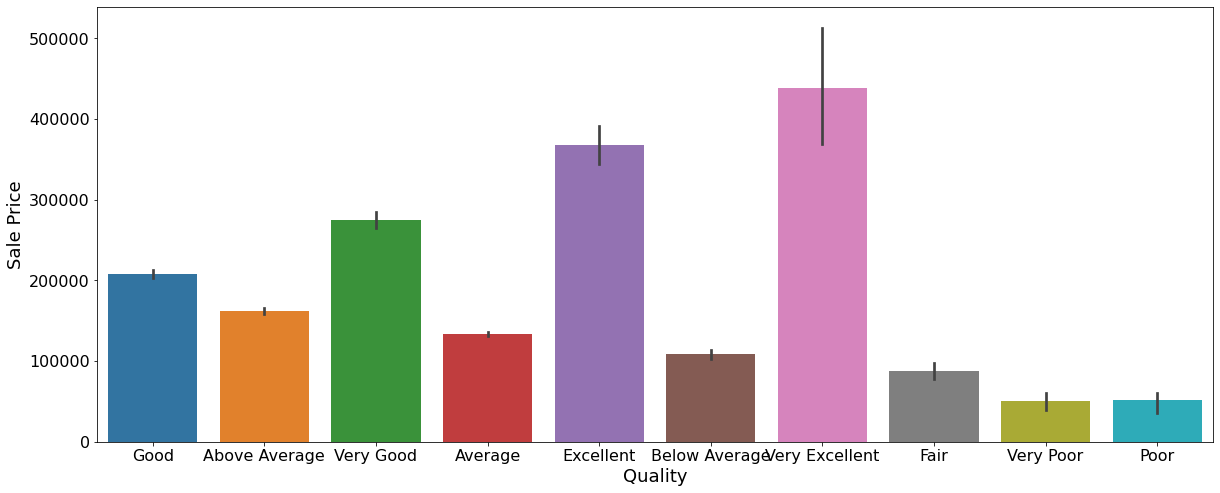

In [140]:
#effect of overall quality on sale price
plt.figure(figsize=(20, 8))
dataframe.OverallQual = dataframe.OverallQual.replace({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',
                                                        6:'Above Average',5:'Average',4:'Below Average',
                                                        3:'Fair',2:'Poor',1:'Very Poor'})
sns.barplot(x="OverallQual", y="SalePrice", data=dataframe)
plt.xlabel('Quality',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=18)
plt.yticks(fontsize=16)
plt.show()

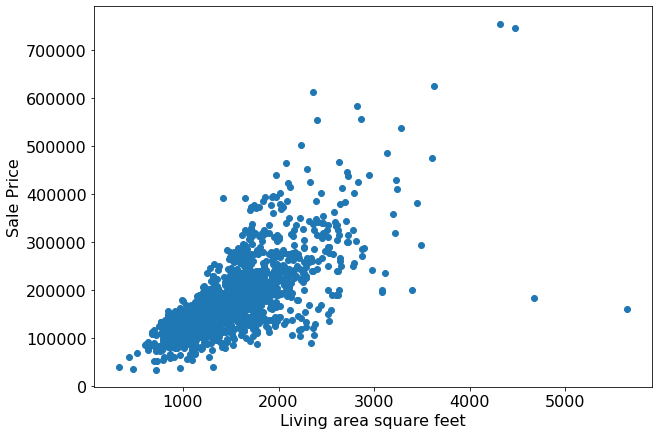

In [141]:
#plot to check effect of living area sft on sale price(basic real estate knowledge implementation)
plt.figure(figsize=(10,7))
plt.scatter(dataframe['GrLivArea'],dataframe['SalePrice'])
plt.xlabel('Living area square feet',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Sale Price',fontsize=16)
plt.yticks(fontsize=16)
plt.show()

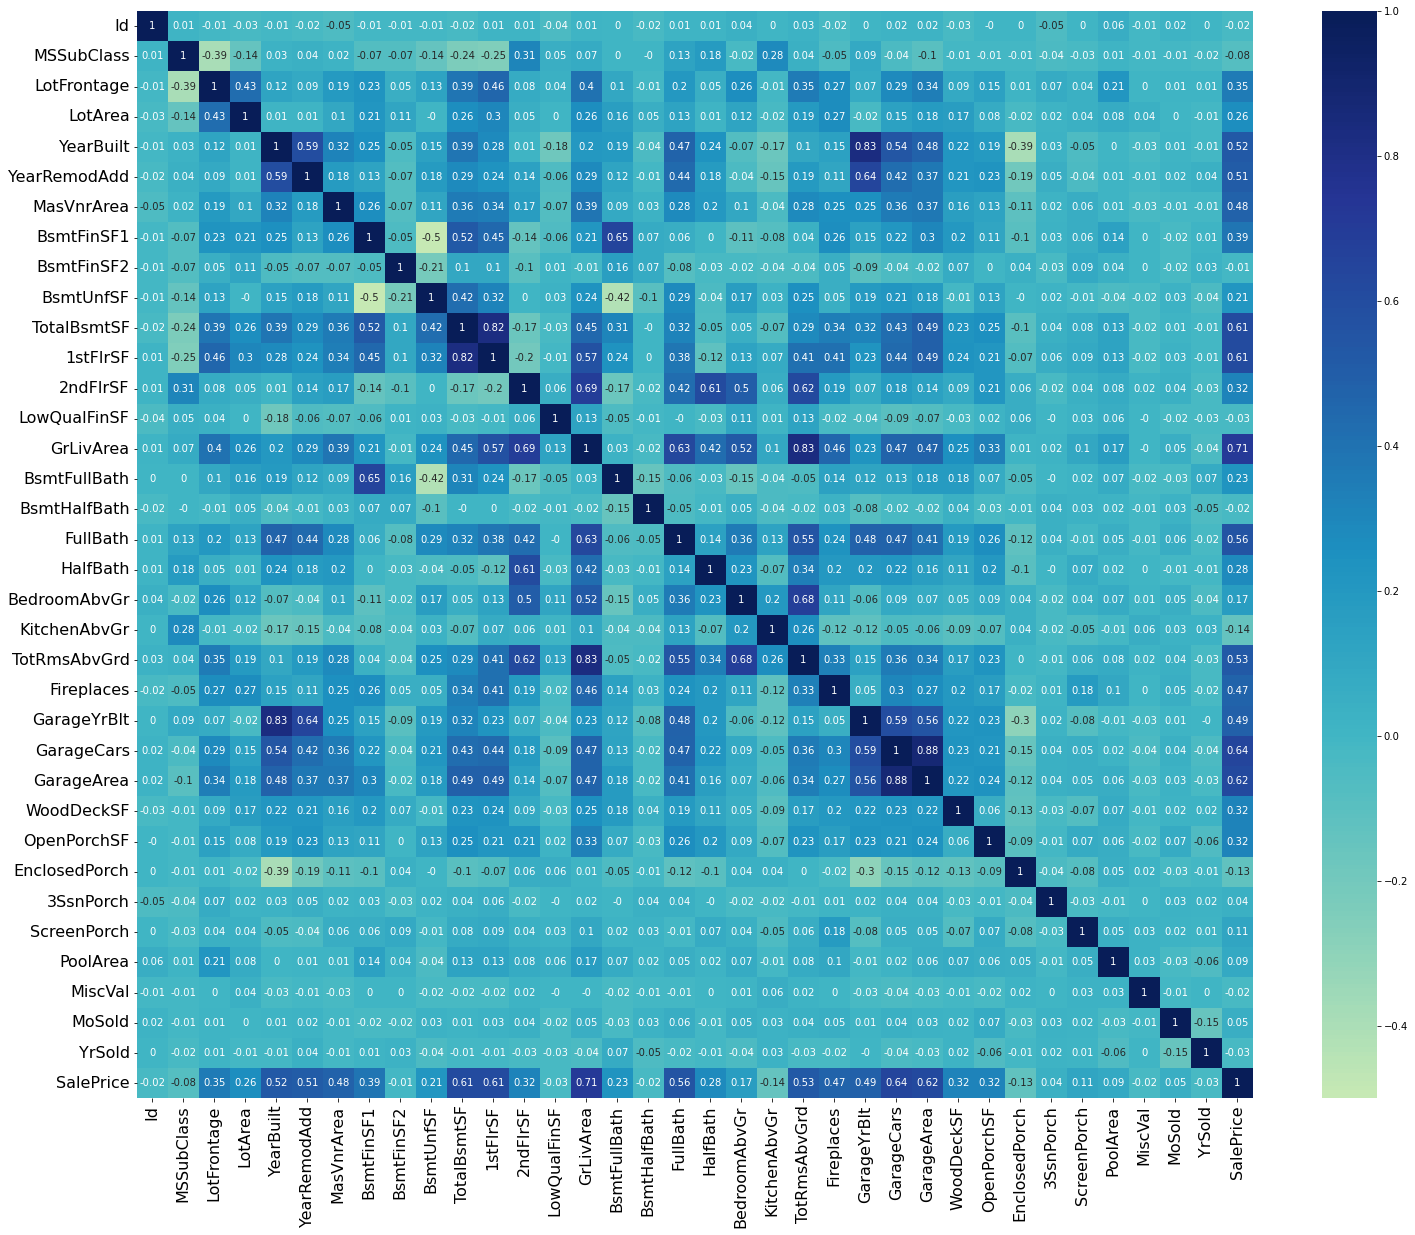

In [142]:
#correlation check using heatmap
plt.subplots(figsize = (25,20))
sns.heatmap(round(dataframe.corr(),2), cmap='YlGnBu' , annot=True, center = 0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

### Observations:
- Houses build recently have higher selling price.
- Good quality and condition of house results in more selling price.
- Area(sft) is directly proportional the sale price.


## **DATA PREPARATION**

In [143]:
#drop ID column from dataset as it has no impact
dataframe.drop('Id', axis=1, inplace=True)
dataframe.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [144]:
#create a derived column for age of property
dataframe['AgeOfProp'] = (dataframe['YrSold'] - dataframe['YearBuilt'])
dataframe['garage_age'] = dataframe['YrSold'] - dataframe['GarageYrBlt']
dataframe.drop('GarageYrBlt',axis=1,inplace=True)
dataframe.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOfProp,garage_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,7.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,8.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8.0


In [145]:
#handling redundancy present in dataset using function
def redundancy(dataframe):
    redundant = []
    for i in dataframe.columns:
        counts = dataframe[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(dataframe) * 100 > 99:           #features having redundancy more than 99%
            redundant.append(i)
    redundant = list(redundant)
    return redundant
redundancy = redundancy(dataframe)
redundancy

['Street', 'Utilities', 'PoolArea']

In [146]:
#drop the columns with high redundancy
dataframe.drop(redundancy,axis=1,inplace=True)
dataframe.shape

(1460, 78)

In [147]:
#handling outliers present in dataset using function
def outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']           #seen in EDA and data visualization
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
dataframe = outliers(dataframe)
dataframe.shape

(1455, 78)

In [148]:
#checking count of null values
round(dataframe.isnull().sum()/len(dataframe.index)*100,2).sort_values(ascending=False)

PoolQC           99.59
MiscFeature      96.43
Alley            93.75
Fence            80.69
FireplaceQu      47.42
LotFrontage      17.59
garage_age        5.57
GarageType        5.57
GarageFinish      5.57
GarageQual        5.57
GarageCond        5.57
BsmtFinType2      2.61
BsmtExposure      2.61
BsmtFinType1      2.54
BsmtCond          2.54
BsmtQual          2.54
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofMatl          0.00
OpenPorchSF       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
GarageCars        0.00
GarageArea        0.00
LandSlope         0.00
LotConfig         0.00
PavedDrive        0.00
WoodDeckSF        0.00
EnclosedPorch     0.00
KitchenAbvGr      0.00
3SsnPorch         0.00
ScreenPorch       0.00
LandContour       0.00
LotShape          0.00
LotArea           0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType   

In [149]:
#handling missing values
#filling the missing values as none for text based features and ) for numerical features
dataframe['PoolQC'] = dataframe['PoolQC'].fillna('None')
dataframe['MiscFeature'] = dataframe['MiscFeature'].fillna('None')
dataframe['Alley'] = dataframe['Alley'].fillna('None')
dataframe['Fence'] = dataframe['Fence'].fillna('None')
dataframe['BsmtExposure'] = dataframe['BsmtExposure'].fillna('None')
dataframe['BsmtFinType1'] = dataframe['BsmtFinType1'].fillna('None')
dataframe['BsmtFinType2'] = dataframe['BsmtFinType2'].fillna('None')
dataframe['BsmtCond'] = dataframe['BsmtCond'].fillna('None')
dataframe['BsmtQual'] = dataframe['BsmtQual'].fillna('None')
dataframe['FireplaceQu'] = dataframe['FireplaceQu'].fillna('None')
dataframe['MasVnrType'] = dataframe['MasVnrType'].fillna('None')
dataframe['MasVnrArea'] = dataframe['MasVnrArea'].fillna(0)
dataframe['GarageCond'] = dataframe['GarageCond'].fillna('None')
dataframe['GarageType'] = dataframe['GarageType'].fillna('None')
dataframe['GarageFinish'] = dataframe['GarageFinish'].fillna('None')
dataframe['GarageQual'] = dataframe['GarageQual'].fillna('None')
dataframe['garage_age'] = dataframe['GarageQual'].fillna(0)  
dataframe['LotFrontage'] = dataframe.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))  #using median to handle null values
dataframe['Electrical'] = dataframe['Electrical'].fillna(dataframe['Electrical'].mode()[0])  #using mode as the null values percentage is very low

In [150]:
#check if any null values are not handled
round(dataframe.isnull().sum()/len(dataframe.index)*100,5).sort_values(ascending=False)

MSSubClass       0.0
KitchenAbvGr     0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
BedroomAbvGr     0.0
GarageArea       0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageCars       0.0
GarageQual       0.0
MSZoning         0.0
MiscFeature      0.0
AgeOfProp        0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
Fence            0.0
GarageCond       0.0
PoolQC           0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
Condition1       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType     

In [151]:
#handling data types
dataframe[['MSSubClass']] = dataframe[['MSSubClass']].astype(str) 
dataframe['YrSold'] = dataframe['YrSold'].astype(str)
dataframe['MoSold'] = dataframe['MoSold'].astype(str)

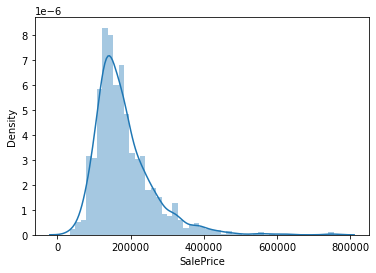

In [152]:
#check for target variable distribution
sns.distplot(dataframe['SalePrice'])
plt.show()

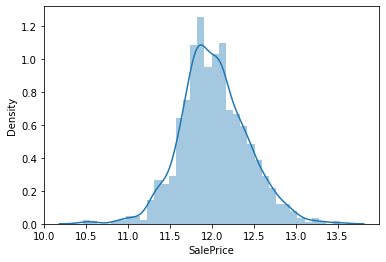

In [153]:
#applying log Transformation
dataframe['SalePrice']=np.log1p(dataframe['SalePrice'])
sns.distplot(dataframe['SalePrice'])
plt.show()

In [154]:
#creating dummy variables using loop
num_col=[]
cat_col=[]
for i in dataframe.columns:
    if dataframe[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(dataframe[cat_col])   
dataframe=pd.concat([dataframe,df_dummy],axis=1)
dataframe= dataframe.drop(cat_col,axis=1)
dataframe.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,AgeOfProp,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Above Average,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Above Average,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,Hea

In [155]:
#seperating target variable from the data set
X = dataframe.drop(['SalePrice'], axis=1)
y = dataframe['SalePrice']
#splitting the dataset into train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [156]:
#using MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [157]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1018, 348)
y_train (1018,)


## **RIDGE & LASSO REGRESSION**

In [158]:
# Chekcing the VIF
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>12]
high_vif

,Features,VIF
299,garage_age_Po,inf
142,RoofMatl_WdShake,inf
132,OverallCond_Very Poor,inf
133,RoofStyle_Flat,inf
134,RoofStyle_Gable,inf
135,RoofStyle_Gambrel,inf
136,RoofStyle_Hip,inf
137,RoofStyle_Mansard,inf
138,RoofStyle_Shed,inf
139,RoofMatl_CompShg,inf


In [159]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 7 folds for each of 11 candidates, totalling 77 fits


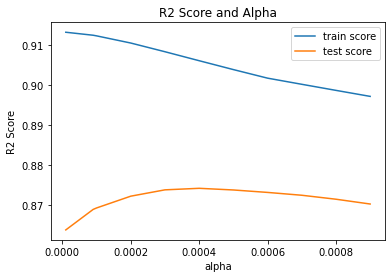

optimum alpha is: 0.0004
R2 Score on the test dataset for optimum alpha is: 0.8390289622881766
MSE on the test dataset for optimum alpha is 0.026480977634944784


In [160]:
#lasso model
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)
#perform cross validation
folds = 7
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
#graph plot
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('optimum alpha is:',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('R2 Score on the test dataset for optimum alpha is:',r2_score(y_test, y_test_pred))
print('MSE on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

Fitting 7 folds for each of 28 candidates, totalling 196 fits


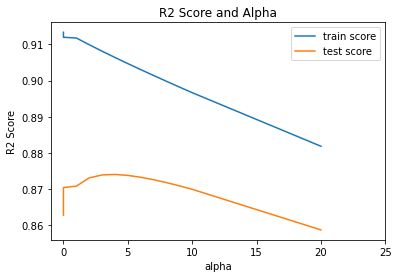

optimum alpha is: 4
R2 Scoreon the test dataset for optimum alpha is: 0.8342219768092193
MSE on the test dataset for optimum alpha is: 0.02727176383331458


In [161]:
#ridge model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)
#performing cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
#graph plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('optimum alpha is:',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('R2 Scoreon the test dataset for optimum alpha is:',r2_score(y_test, y_test_pred))
print('MSE on the test dataset for optimum alpha is:', mean_squared_error(y_test, y_test_pred))

In [162]:
#coefficients of ridge model
ridge_coeff = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(10)

,Ridge Co-Efficient
TotRmsAbvGrd,0.284637
FullBath,0.243005
GarageArea,0.198691
Fireplaces,0.187396
LotArea,0.179702
OverallQual_Excellent,0.176859
OverallQual_Very Excellent,0.168723
LotFrontage,0.156366
Neighborhood_Crawfor,0.153061
OverallQual_Very Good,0.151662


In [163]:
#coefficients of lasso model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff.head(10)

,Lasso Co-Efficient
TotRmsAbvGrd,0.371795
GarageArea,0.269509
FullBath,0.259821
LotArea,0.216747
OverallQual_Very Excellent,0.211205
OverallQual_Excellent,0.204635
Fireplaces,0.186484
OverallQual_Very Good,0.157054
Neighborhood_Crawfor,0.155746
LotFrontage,0.152347


## **CONCLUSION**
R2 score for the both ridge and lasso model is nearly 83% and from the model we can find the below factors that are impacting sale price.
- Total rooms above grade
- Garage Area
- Lot Area
- Full bathrooms above grade
- Overall house quality (most considered feature by customers)
- Number of fireplaces
- Linear feet of street connected to property
